Our expectations: https://docs.google.com/document/d/1GYsmMG-CwEwakkOSN-LFgtitBdbR00y5iBy99sZl-BU/edit
### 1. Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
#settings for plot
sns.set(
    style='whitegrid',
    palette='CMRmap_r',
    rc={'grid.color' : '.96'}
)
color = sns.color_palette()

### 2. Load data

In [7]:
# Load cleaned successful data
s_projects = pd.read_csv('./data/projects/projects_cleaned.csv')
s_rewards = pd.read_csv('./data/rewards/rewards_cleaned.csv')
s_creaters = pd.read_csv('./data/creaters/creaters_cleaned.csv')

# Clear two unamed columns
s_projects.drop('Unnamed: 0', inplace = True, axis=1)
s_rewards.drop('Unnamed: 0', inplace = True, axis=1)
s_creaters.drop('Unnamed: 0', inplace = True, axis=1)

# Drop duplicates
s_projects = s_projects.drop_duplicates()
s_creaters = s_creaters.drop_duplicates()
s_rewards = s_rewards.drop_duplicates()


In [73]:
# Load cleaned failed data
f_projects = pd.read_csv('./data/failed/projects_cl.csv')
f_rewards = pd.read_csv('./data/failed/rewards.csv')
f_creaters = pd.read_csv('./data/failed/creaters.csv')

# Clear two unamed columns
f_projects.drop('Unnamed: 0', inplace = True, axis=1)
f_rewards.drop('Unnamed: 0', inplace = True, axis=1)
f_creaters.drop('Unnamed: 0', inplace = True, axis=1)

# Filter some successful projects
filter_ = f_projects[f_projects['status'] == 'Successful']
s_links = filter_[['pro_link','creater_link']]
f_projects = f_projects[f_projects['status'] == 'Failed']
for _,l in s_links.iterrows():
    f_rewards = f_rewards[f_rewards['pro_link'] != l['pro_link']]
    f_creaters = f_creaters[f_creaters['creater_link'] != l['creater_link']]

# Drop duplicates
f_projects = f_projects.drop_duplicates()
f_creaters = f_creaters.drop_duplicates()
f_rewards = f_rewards.drop_duplicates()


#### Clean data again

In [11]:
# Remove outliers of data
s_projects = s_projects[s_projects['percentage_fund'] < 1000] # some projects have millions percentage funds


In [88]:
# Clean backers, because some of them will be greater than 1000, ex: 1,160
def clean_backers(backers):
    try:
        res = float(backers)
    except:
        res = float(backers.replace(',',''))
    return res

In [ ]:
s_projects['end_date'] = pd.to_datetime(s_projects['end_date'])

In [89]:
s_projects['backers'] = s_projects['backers'].apply(lambda x: clean_backers(x))
f_projects['backers'] = s_projects['backers'].apply(lambda x: clean_backers(x))
s_rewards['num_backers'] = s_rewards['num_backers'].apply(lambda x: clean_backers(x))
f_rewards['num_backers'] = s_rewards['num_backers'].apply(lambda x: clean_backers(x))

In [90]:
# Change all of thumnail_type to lower case
s_projects['thumbnail_type'] = s_projects['thumbnail_type'].apply(lambda x: x.lower())

In [15]:
s_projects.head()

,backers,creater_link,end_date,funded,language,max_price,min_price,num_comments,num_contributions,num_news,number_rewards,percentage_fund,pro_link,short_des,status,subcategory,target,thumbnail_type,title
0,244.0,https://www.kisskissbankbank.com/en/users/chic...,2018-12-06,13345.0,fr,10001.0,5.0,49.0,244.0,3.0,13.0,111.0,https://www.kisskissbankbank.com/en/projects/c...,"aidez, atteindre, 15, 000e, chiche, mobile, no...",Successful,NaN,12000.0,jpg,CHICHE se lance dans le pois chiche chocolaté !
1,49.0,https://www.kisskissbankbank.com/en/users/van-...,2018-12-06,3848.0,fr,100.0,5.0,6.0,49.0,0.0,4.0,101.0,https://www.kisskissbankbank.com/en/projects/r...,"trouver, seul, clic, tous, évènements, automob...",Successful,NaN,3800.0,png,RDV! Le site qui appartient aux passionnés d'a...
2,823.0,https://www.kisskissbankbank.com/en/users/mc4--2,2018-12-05,47400.0,fr,200.0,5.0,169.0,823.0,7.0,3.0,237.0,https://www.kisskissbankbank.com/en/projects/l...,"après, avoir, disparu, pendant, près, 80, ans,...",Successful,NaN,20000.0,jpg,LA MARCHE DES LOUPS
3,96.0,https://www.kisskissbankbank.com/en/users/baln...,2018-12-05,115.0,fr,1500.0,30.0,24.0,106.0,3.0,11.0,128.0,https://www.kisskissbankbank.com/en/projects/b...,"découvrez, marque, balnoir, paris, lancement, ...",Successful,NaN,90.0,png,"Balnoir Paris, la parfaite petite robe noire"
4,228.0,https://www.kisskissbankbank.com/en/users/luci...,2018-12-05,20511.0,en,1200.0,5.0,34.0,205.0,18.0,11.0,137.0,https://www.kisskissbankbank.com/en/projects/h...,"israeli, palestinian, doctors, work, together,...",Successful,NaN,15000.0,jpg,HEALING HEARTS // UNE HISTOIRE DE COEURS


### 3. Data descriptions

#### 3.1 Number of projects, rewards, creators we have, both successful and failed

In [ ]:
print('The number of successful projects: {}'.format(s_projects.shape[0]))
print('The number of successful rewards: {}'.format(s_rewards.shape[0]))
print('The number of successful creaters: {}'.format(s_creaters.shape[0]))

print('The number of failed projects: {}'.format(f_projects.shape[0]))
print('The number of failed rewards: {}'.format(f_rewards.shape[0]))
print('The number of failed creaters: {}'.format(f_creaters.shape[0]))

The number of successful projects: 11818
The number of successful rewards: 110993
The number of successful creaters: 11181
The number of failed projects: 221
The number of failed rewards: 1535
The number of failed creaters: 220


#### 3.2 The average, median, standard deviation of percentage_fund

In [31]:
percentage_fund = pd.concat([s_projects['percentage_fund'],f_projects['percentage_fund']])
print('Mean of percentage_fund: {}'.format(percentage_fund.mean()))
print('Standard deviation of percentage_fund: {}'.format(percentage_fund.std()))
print('Max of percentage_fund: {}'.format(percentage_fund.max()))
print('Min of percentage_fund: {}'.format(percentage_fund.min()))
print('Median of percentage_fund: {}'.format(percentage_fund.median()))

Mean of percentage_fund: 122.47622271111864
Standard deviation of percentage_fund: 51.12657694041165
Max of percentage_fund: 956.0
Min of percentage_fund: 80.0
Median of percentage_fund: 107.0


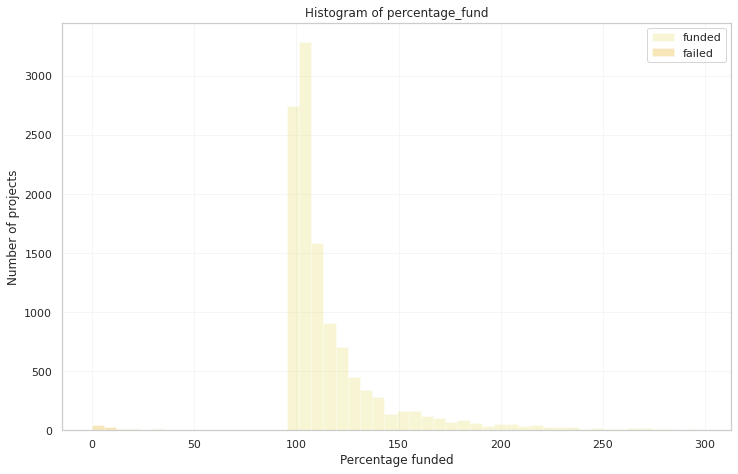

In [79]:
#maybe it will be more informative if we just reduce the x axis range, instead of the log?

percentage_fund = pd.DataFrame(data = {'funded': s_projects['percentage_fund'],'failed': f_projects['percentage_fund']})
fig, ax = plt.subplots(figsize=(12,7.5))

percentage_fund[percentage_fund['funded'] < 300].plot( ax = ax,
         kind = 'hist',
         bins = 50, 
         alpha = .3)

plt.xlabel('Percentage funded')
plt.ylabel('Number of projects')
plt.title('Histogram of percentage_fund')
plt.legend(percentage_fund.columns)

plt.show()

#### 3.3 The average, median, standard deviation of funded, target

In [38]:
funded = pd.concat([s_projects['funded'],f_projects['funded']])
print('Mean of funded: {}'.format(funded.mean()))
print('Standard deviation of funded: {}'.format(funded.std()))
print('Max of funded: {}'.format(funded.max()))
print('Min of funded: {}'.format(funded.min()))
print('Median of funded: {}'.format(funded.median()))

Mean of funded: 6433.174394990692
Standard deviation of funded: 11494.47610760798
Max of funded: 444390.0
Min of funded: 8.0
Median of funded: 4410.0


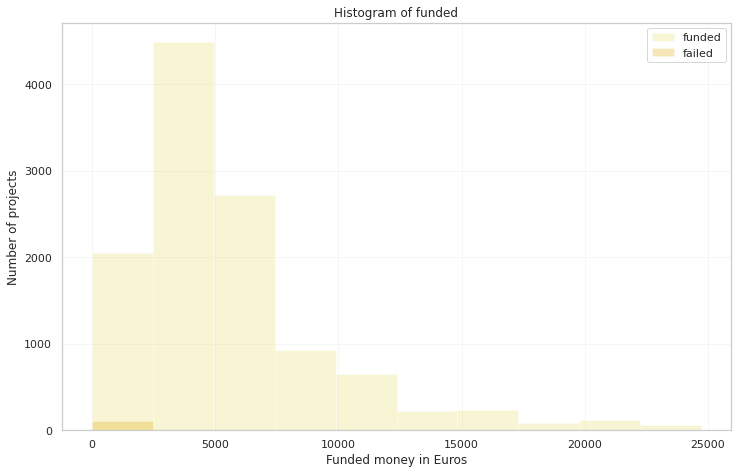

In [74]:
#I also think that we need to compare failed and funded projects, 
#but we have so less data about failed, that there is no difference on the graph shown

funded = pd.DataFrame(data = {'funded': s_projects['funded'],'failed': f_projects['funded']})

fig, ax = plt.subplots(figsize=(12,7.5))

funded[funded['funded'] < 25000].plot(
    kind = 'hist',
    alpha = .3, 
    ax = ax)

plt.xlabel('Funded money in Euros')
plt.ylabel('Number of projects')
plt.title('Histogram of funded')
plt.legend(funded.columns)
plt.show()

In [83]:
target = pd.concat([s_projects['target'],f_projects['target']])
print('Mean of target: {}'.format(target.mean()))
print('Standard deviation of target: {}'.format(target.std()))
print('Max of target: {}'.format(target.max()))
print('Min of target: {}'.format(target.min()))
print('Median of target: {}'.format(target.median()))

Mean of target: 5316.945178170944
Standard deviation of target: 8138.254335788316
Max of target: 360000.0
Min of target: 5.0
Median of target: 4000.0


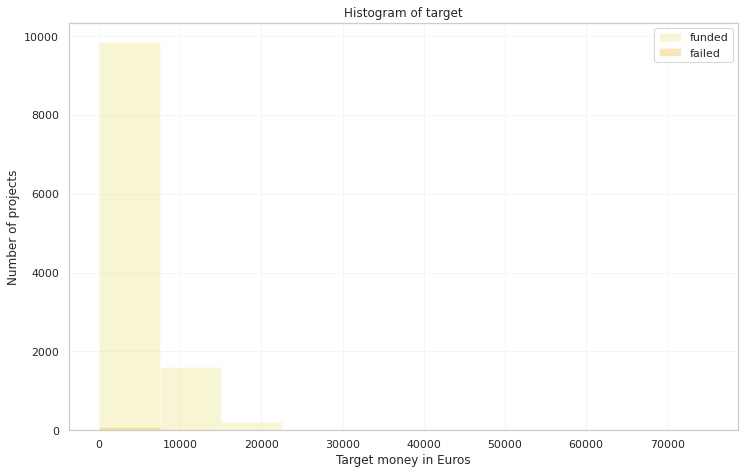

In [91]:
target = pd.DataFrame(data = {'funded': s_projects['target'],'failed': f_projects['target']})

fig, ax = plt.subplots(figsize=(12,7.5))

target[target['funded'] < 25000].plot(
    kind = 'hist',
    alpha = .3, 
    ax = ax)

plt.xlabel('Target money in Euros')
plt.ylabel('Number of projects')
plt.title('Histogram of target')
plt.show()

#### 3.4 The average, median, standard deviation of backers

In [92]:
backers = pd.concat([s_projects['backers'],f_projects['backers']])
print('Mean of backers: {}'.format(backers.mean()))
print('Standard deviation of backers: {}'.format(backers.std()))
print('Max of backers: {}'.format(backers.max()))
print('Min of backers: {}'.format(backers.min()))
print('Median of backers: {}'.format(backers.median()))

Mean of backers: 97.34927949061662
Standard deviation of backers: 205.6162643503152
Max of backers: 10266.0
Min of backers: 1.0
Median of backers: 66.0


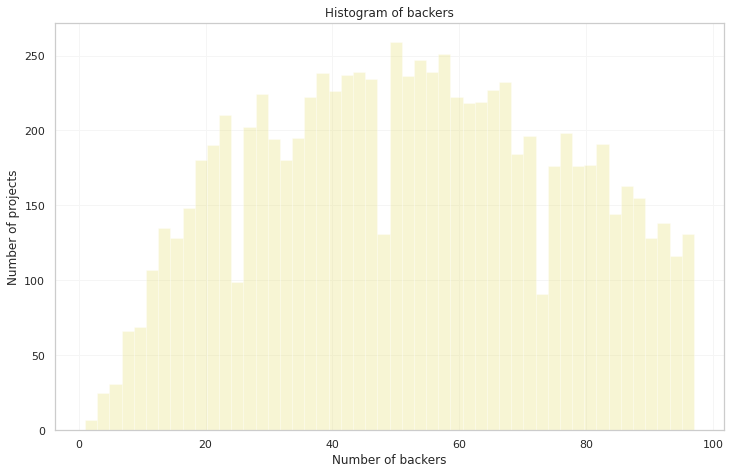

In [93]:
fig, ax = plt.subplots(figsize=(12,7.5))

plt.hist(backers[backers < backers.mean()],
         bins=50,
         alpha = .3)

plt.xlabel('Number of backers')
plt.ylabel('Number of projects')
plt.title('Histogram of backers')
plt.show()

#### 3.5 The number of projects that have thumbnail is an jpeg, png, gif, or svg

In [94]:
thumbnail_type = pd.concat([s_projects['thumbnail_type'],f_projects['thumbnail_type']])
print('The number of projects with jpeg thumbnail: {}'.format(len(thumbnail_type[(thumbnail_type == 'jpg') | (thumbnail_type == 'jpg')])))
print('The number of projects with png thumbnail: {}'.format(len(thumbnail_type[thumbnail_type == 'png'])))
print('The number of projects with gif thumbnail: {}'.format(len(thumbnail_type[thumbnail_type == 'gif'])))
print('The number of projects with svg thumbnail: {}'.format(len(thumbnail_type[thumbnail_type == 'svg'])))


The number of projects with jpeg thumbnail: 8560
The number of projects with png thumbnail: 2582
The number of projects with gif thumbnail: 497
The number of projects with svg thumbnail: 1


#### 3.6 The average, median, standard deviation of the number of rewards

In [ ]:
number_rewards = pd.concat([s_projects['number_rewards'],f_projects['number_rewards']])
print('Mean of number_rewards: {}'.format(number_rewards.mean()))
print('Standard deviation of number_rewards: {}'.format(number_rewards.std()))
print('Max of number_rewards: {}'.format(number_rewards.max()))
print('Min of number_rewards: {}'.format(number_rewards.min()))
print('Median of number_rewards: {}'.format(number_rewards.median()))

Mean of number_rewards: 8.560096353517734
Standard deviation of number_rewards: 4.15237948434103
Max of number_rewards: 143.0
Min of number_rewards: 0.0
Median of number_rewards: 8.0


#### 3.7 The average, median, standard deviation of the number of comments

In [ ]:
num_comments = pd.concat([s_projects['num_comments'],f_projects['num_comments']])
print('Mean of num_comments: {}'.format(num_comments.mean()))
print('Standard deviation of num_comments: {}'.format(num_comments.std()))
print('Max of num_comments: {}'.format(num_comments.max()))
print('Min of num_comments: {}'.format(num_comments.min()))
print('Median of num_comments: {}'.format(num_comments.median()))

Mean of num_comments: 19.595398288894426
Standard deviation of num_comments: 50.22404711104708
Max of num_comments: 4394.0
Min of num_comments: 0.0
Median of num_comments: 13.0


#### 3.8 The number of words in each text, the most frequent words, the number of spelling errors

In [97]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter

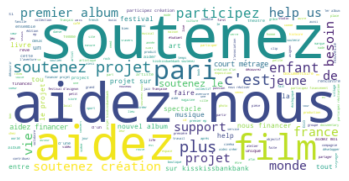

In [99]:
#funded projects
text_success = ', '.join([str(i) for i in s_projects['short_des']])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_success)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

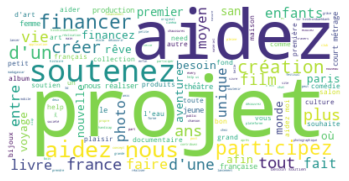

In [100]:
#failed projects
text_failed = ', '.join([str(i) for i in f_projects['short_des']])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_failed)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

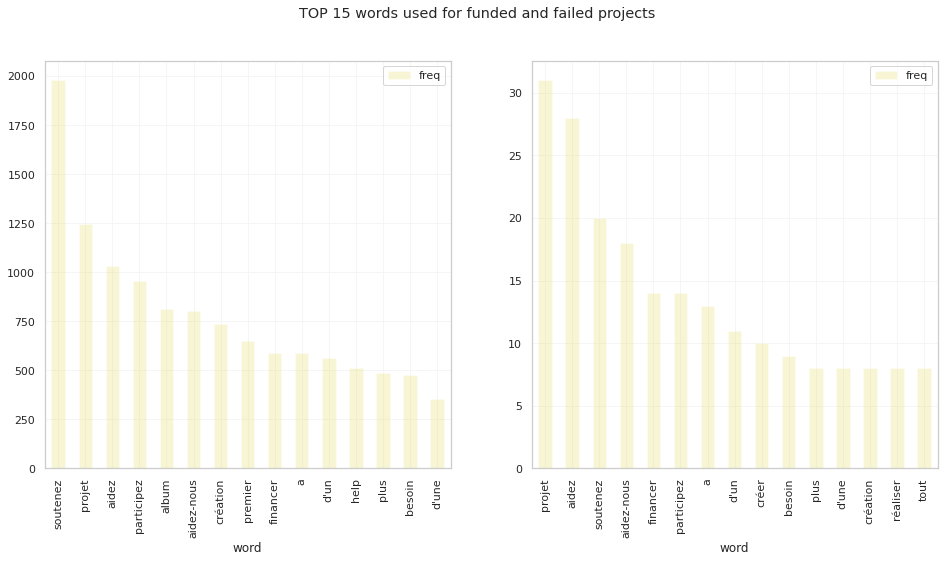

In [149]:
df1 = pd.DataFrame(Counter(text_success.split(', ')).most_common(15), columns = ['word', 'freq'])
df2 = pd.DataFrame(Counter(text_failed.split(', ')).most_common(15), columns = ['word', 'freq'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7.5))
fig.suptitle('TOP 15 words used for funded and failed projects')

df1.plot(
    kind = 'bar',
    ax=ax1,
    alpha = .3,
    x = 'word'
    )

df2.plot(
    kind = 'bar',
    ax=ax2,
    alpha = .3,
    x = 'word'
    )

plt.show()

### 4. Analysis

#### 4.1 Tables

##### 4.1.1 The number of successful and failed projects by year & The number of projects that have subcategories by year


##### 4.1.2 The average number of comments regarding the language

##### 4.1.3 Comparing 2020 with other years, due to COVID 19:

#### 4.2 Graphs

##### 4.2.1 Bar chart: The number of successful and failed projects for each language


In [224]:
lang_s = s_projects[['language', 'pro_link']].groupby(['language']).count().rename(columns={'pro_link':'Number of the projects'})
lang_s = lang_s.reset_index()

In [225]:
lang_f = f_projects[['language', 'pro_link']].groupby(['language']).count().rename(columns={'pro_link':'Number of the projects'})
lang_f = lang_f.reset_index()

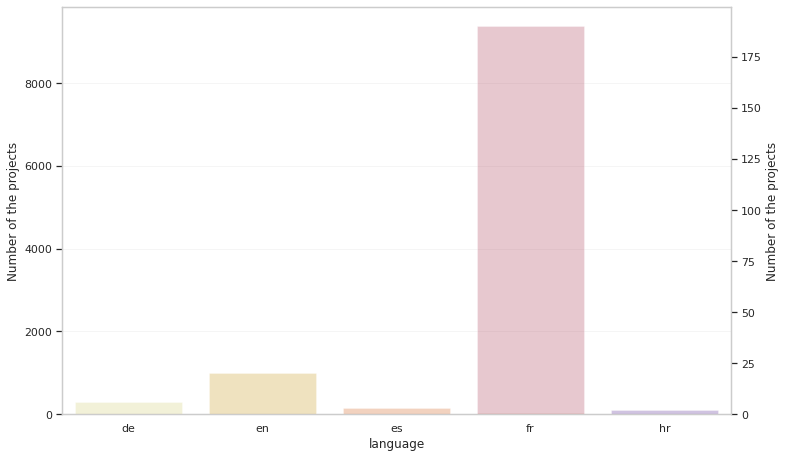

In [226]:
fig, ax1 = plt.subplots(figsize=(12,7.5))
#fig.suptitle('The number of successful and failed projects for each language')

sns.barplot(data = lang_s, x = 'language', y = 'Number of the projects', alpha=.3, ax=ax1)
ax2 = ax1.twinx()
sns.barplot(data = lang_f, x = 'language', y = 'Number of the projects', alpha=.3, ax=ax2)
ax2.grid(False)

plt.xlabel('Language')
plt.ylabel('Number of the projects')

plt.show()

##### 4.2.2 Bar chart, line: Total funded by year, a total of successful projects per year

In [215]:
total_fund = s_projects[['funded', 'end_date']]
total_fund['end_date'] = total_fund['end_date'].dt.year
total = total_fund.groupby(['end_date']).sum().rename(columns={'funded':'funded, (EUR)'})
total['# funded projects'] = total_fund.groupby(['end_date']).count()
total = total.reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


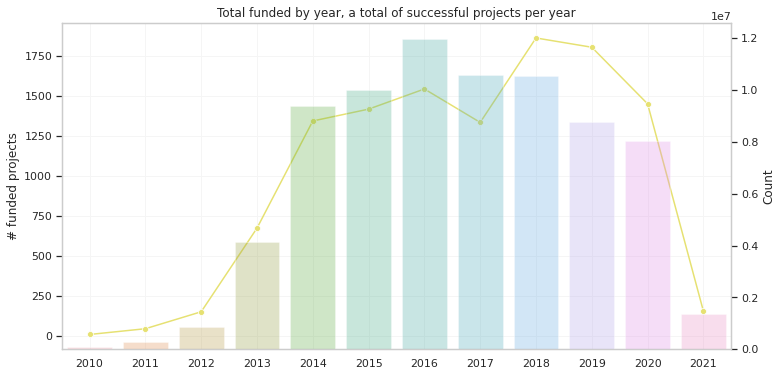

In [217]:
fig, ax1 = plt.subplots(figsize=(12,6))
sns.lineplot(data = total['# funded projects'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()
sns.barplot(data = total, x='end_date', y='funded, (EUR)', alpha=.3, ax=ax2)
ax2.grid(False)

plt.title("Total funded by year, a total of successful projects per year")
plt.ylabel('Count')
plt.xlabel('Categories')
plt.show()

##### 4.2.3 Bar chart: The number of backers per year

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


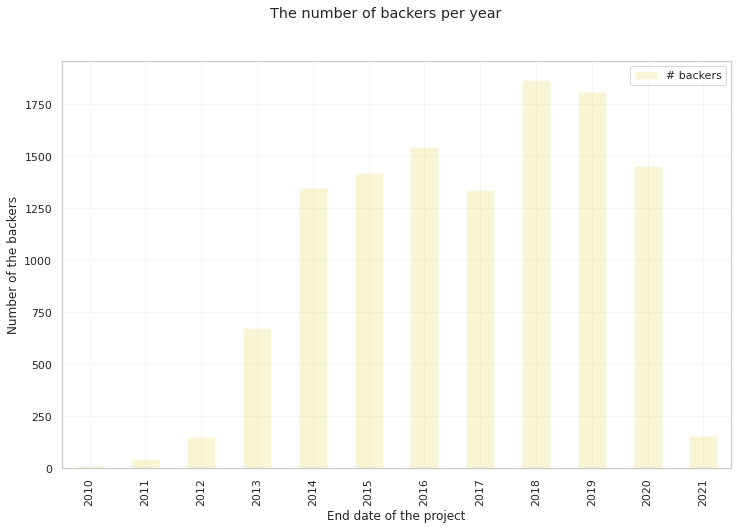

In [218]:
backers_count = s_projects[['backers', 'end_date']]
backers_count['end_date'] = backers_count['end_date'].dt.year
backers_count = backers_count.groupby(['end_date']).count().rename(columns={'backers':'# backers'})
backers_count = backers_count.reset_index()

fig, ax1 = plt.subplots(figsize=(12,7.5))
fig.suptitle('The number of backers per year')

backers_count.plot(
    kind = 'bar',
    ax=ax1,
    alpha = .3,
    x = 'end_date',
    y = '# backers'
    )
plt.xlabel('End date of the project')
plt.ylabel('Number of the backers')

plt.show()

##### 4.2.4 Correlation map

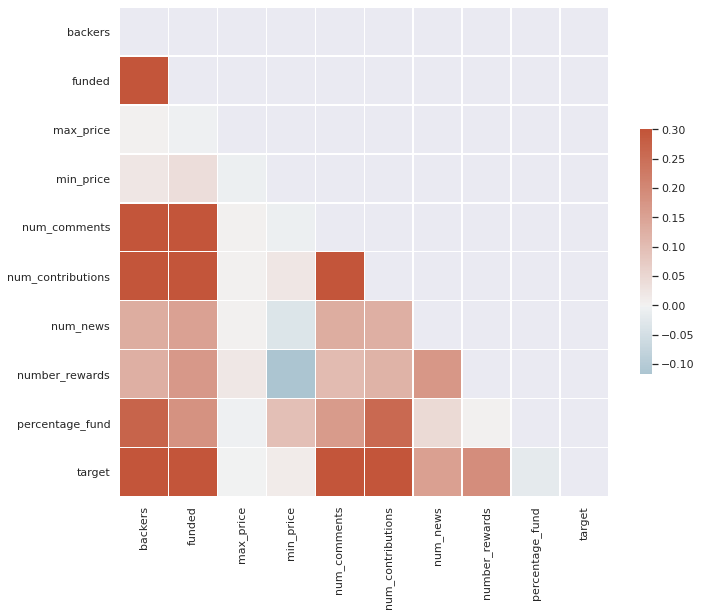

In [152]:
sns.set_theme(style="darkgrid")
# Compute the correlation matrix
corr = s_projects.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


**Subcategories**

In [ ]:
#settings for plot
sns.set(
    style='whitegrid',
    palette='CMRmap_r',
    rc={'grid.color' : '.96'}
)
color = sns.color_palette()

In [211]:
subcategories = ','.join(str(i) for i in s_projects['subcategory'])
projects_sub = s_projects

for category in set(subcategories.split(',')):
  projects_sub[category] = [0] * projects_sub.shape[0]

for i in projects_sub.index:
  project_cats = str(projects_sub['subcategory'][i]).split(',')
  for cat in project_cats:
    if cat in projects_sub.columns:
      projects_sub[cat][i] = 1

d = {}
for category in set(subcategories.split(',')):
  d.update({category:s_projects[category].value_counts()[1]})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


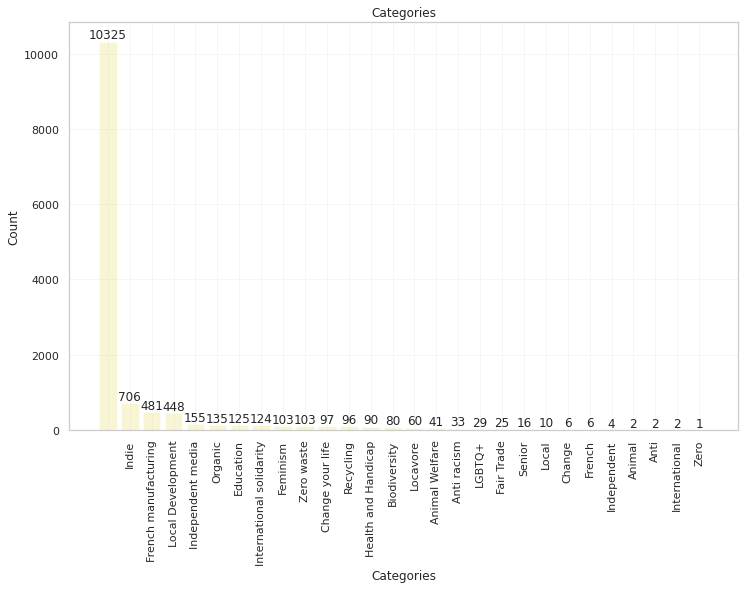

In [212]:
d = dict(sorted(d.items(), key=lambda item: item[1], reverse=True))

fig, ax = plt.subplots(figsize=(12,7.5))

plt.bar(list(d.keys()), d.values(), alpha = .3)

plt.title("Categories")
plt.ylabel('Count')
plt.xlabel('Categories')
plt.xticks(rotation=90)

rects = ax.patches
labels = list(d.values())

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')


plt.show()

**some other data viz**

Text(0.5, 0, 'Project end year')

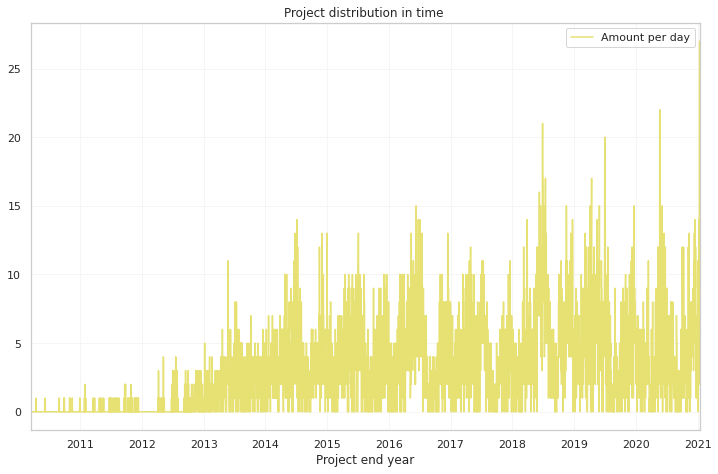

In [214]:
#amount of the projects distributed by end-date
count_date = s_projects[['end_date', 'pro_link']].groupby(['end_date']).count().rename(columns={'pro_link':'count'}).resample('1d').sum().fillna(0)
count_date = count_date.reset_index()

fig, ax = plt.subplots(figsize=(12,7.5))

count_date.plot(
    ax=ax,
    x='end_date', 
    y='count',
)

plt.title('Project distribution in time ')
plt.legend(['Amount per day'])
plt.xlabel('Project end year')

#### 4.3 Linear Regression

##### 4.3.1 y = percentage_fund, x = the remaining features, except: pro_link, title, is_successful, end_date, num_contributions, and creater_link

##### 4.3.2 y = is_successful, x = the remaining features, except: pro_link, title, percentage_fund, end_date, num_contributions, and creater_link


##### 4.3.3 y = num_backers, x = price, min_price, max_price, has_media

##### 4.3.4 y = percentage_fund, x = num_created, num_backed, num_follwed

Extra descriptive analysis

In [234]:
s_projects['num_words'] = [len(str(i).split(',')) for i in s_projects['short_des']]
s_projects.drop(list(set(subcategories.split(','))), axis = 1, inplace = True)

In [237]:
f_projects['num_words'] = [len(str(i).split(',')) for i in f_projects['short_des']]

In [235]:
s_projects.describe()

,backers,funded,max_price,min_price,num_comments,num_contributions,num_news,number_rewards,percentage_fund,target,num_words
count,11818.000000,11818.000000,1.181800e+04,11818.000000,11818.000000,11818.000000,11818.000000,11818.000000,11818.000000,11818.000000,11818.000000
mean,96.903114,6433.174395,1.995350e+05,7.305889,19.908191,98.012100,3.534947,8.587748,122.476223,5309.986207,11.271112
std,205.341543,11494.476108,1.317080e+07,8.000345,50.635586,216.913321,6.266554,4.141828,51.126577,8064.645695,6.799286
min,1.000000,8.000000,-1.000000e+00,-1.000000,0.000000,0.000000,0.000000,0.000000,80.000000,5.000000,1.000000
25%,40.000000,3070.000000,2.000000e+02,5.000000,7.000000,41.000000,0.000000,6.000000,102.000000,2800.000000,7.000000
50%,66.000000,4410.000000,5.000000e+02,5.000000,13.000000,66.000000,1.000000,8.000000,107.000000,4000.000000,11.000000
75%,103.000000,6769.500000,1.000000e+03,10.000000,24.000000,104.000000,5.000000,10.000000,122.000000,6000.000000,14.000000
max,10266.000000,444390.000000,1.000000e+09,300.000000,4394.000000,12506.000000,118.000000,143.000000,956.000000,360000.000000,126.000000


In [238]:
f_projects.describe()

,percentage_fund,funded,target,backers,number_rewards,min_price,max_price,num_news,num_comments,num_contributions,num_words
count,221.000000,221.000000,221.000000,118.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,13.434389,659.104072,5689.076923,142.033898,7.081448,7.239819,1281.004525,1.366516,2.868778,12.963801,11.180995
std,16.592756,1393.872618,11421.617649,228.053298,4.447948,9.337191,4331.127051,3.228645,4.252911,21.987983,5.380419
min,0.000000,0.000000,40.000000,13.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,35.000000,2000.000000,56.250000,5.000000,5.000000,100.000000,0.000000,0.000000,2.000000,8.000000
50%,7.000000,220.000000,3500.000000,90.500000,7.000000,5.000000,220.000000,0.000000,1.000000,6.000000,11.000000
75%,20.000000,642.000000,6000.000000,145.000000,9.000000,10.000000,1000.000000,1.000000,4.000000,14.000000,14.000000
max,88.000000,10179.000000,145000.000000,2055.000000,28.000000,90.000000,50000.000000,25.000000,29.000000,173.000000,47.000000


In [ ]:
#missing values
s_projects['subcategory'].isna().sum()

10325

In [ ]:
f_projects['subcategory'].isna().sum()

206